In [1]:
import ROOT
import numpy as np
import root_numpy as rnp
from plotly.offline import init_notebook_mode, iplot
import random

In [2]:
import plotly 
plotly.tools.set_credentials_file(username='cdesio88', api_key='qhPfEEFgqcHRbYWB17Yc')

In [3]:
init_notebook_mode(connected=True)

In [4]:
NFLOORS = 18
NSTRING = 115
PMTSPERDOM = 31
pmtstot = NFLOORS * NSTRING * PMTSPERDOM
ndoms = NFLOORS * NSTRING

prova = "../../ROOT_files/km3_v4_numucc_1.B.JTE.root"

orig = rnp.root2array("prova", treename="MONTECARLO", branches="MONTE_CARLO.coord_origin")
- x                             13.887
- y                             6.713
- z                             405.932

#### `coord_origin`, stored in the mc files, contains the shift to apply to the simulated events

In [17]:
coord_origin = np.asarray((13.887,6.713,405.932))
print(coord_origin)

[  13.887    6.713  405.932]


### execute this cell to load files on the Vagrant machine

In [6]:
detfile = "../trigger_optimisation_files/km3net_jul13_90m.detx"
nuefile = "../../ROOT_files/km3_v4_nuecc_1.evt.JTE.aa.root"
numufile = "../../ROOT_files/km3_v4_numucc_1_B.evt.aa.root"

### execute this cell to load files on server

In [5]:
detfile = "utilities/km3net_jul13_90m.detx"

nue_st_file = "utilities/km3_v4_nuecc_1.evt.JTE.aa.root"
nue_100ns_4hits_file = "utilities/km3_v4_nuecc_1.evt_st_100ns_4hits.JTE.aa.root"
nue_reco_file = "utilities/km3_v4_nuecc_1.evt.JEnergy.aa.root"

numu_100ns_4hits_file = "utilities/km3_v4_numucc_1.evt_st_100ns_4hits.JTE.aa.root"
numu_reco_file = "utilities/km3_v4_nuecc_1.evt.JEnergy.aa.root"
numu_st_file = "utilities/km3_v4_numucc_1_B.evt.aa.root"


In [49]:
numuncfile = "utilities/km3_v4_numuNC_1.evt.JTE.aa.root"
nuencfile = "utilities/km3_v4_nueNC_1.evt.JTE.aa.root"

In [8]:
muatm_file = "utilities/km3net_jul13_90m_muatm10T1.km3_v5r2.evt.JTE.aa.root"

In [6]:
from detector_positions import structured_positions

In [7]:
doms, pmts = structured_positions(detfile)

### import lattice postions and lattice_doms (doms positions on the regular lattice)

In [10]:
from lattice_doms import lattice_doms

In [10]:
lattice, l_doms = lattice_doms(detfile)

### import trees from `aanet`files

In [8]:
from load_trees import load_trees

In [10]:
ch_id_numu_st, dom_id_numu_st, trig_numu_st, times_numu_st = load_trees(numu_st_file)
ch_id_nue_st, dom_id_nue_st, trig_nue_st, times_nue_st = load_trees(nue_st_file)

In [13]:
ch_id_numunc, dom_id_numunc, trig_numunc, times_numunc = load_trees(numuncfile)

NameError: name 'numuncfile' is not defined

In [51]:
ch_id_nuenc, dom_id_nuenc, trig_nuenc, times_nuenc = load_trees(nuencfile)

In [16]:
ch_id_muatm, dom_id_muatm, trig_muatm, times_muatm = load_trees(muatm_file)

### import trees from 100ns_st_files 

In [12]:
ch_id_numu_100ns_4hits, dom_id_numu_100ns_4hits, trig_numu_100ns_4hits, times_numu_100ns_4hits = load_trees(numu_100ns_4hits_file)
ch_id_nue_100ns_4hits, dom_id_nue_100ns_4hits, trig_nue_100ns_4hits, times_nue_100ns_4hits = load_trees(nue_100ns_4hits_file)

### import trees from reco files 

In [14]:
ch_id_numu_reco, dom_id_numu_reco, trig_numu_reco, times_numu_reco = load_trees(numu_reco_file)
ch_id_nue_reco, dom_id_nue_reco, trig_nue_reco, times_nue_reco = load_trees(nue_reco_file)

In [115]:
def shifter(dom_id, trig, ndoms):
    shifted_doms = []
    for evt in range(dom_id_numu_st.size):
        dom_filter = dom_id_numu_st[evt][trig_numu_st[evt]==1]-1
        shifted = dom_filter+ndoms if np.all(dom_filter+ndoms <2070) else dom_filter
        pdoms_hit = doms[shifted]
        shifted_doms.append(pdoms_hit)
    sh_doms_positions = np.asarray(shifted_doms)
    return sh_doms_positions

In [112]:
shifted_doms = shifter(dom_id_numu_st, trig_numu_st, 1)


In [11]:
def hits_positions(evt, dom_id, trig, ch_id):
    """
    Function to calculate the 3D positions of the triggered events

    Parameters:
    -----------
    evt : np.int
        the event id
    Returns:
    --------
    ppmts_hit : np.ndarray
        array containing the positions of the pmts hit for the selected event 
    pdoms_hit : np.ndarray
        array containing the positions of the doms hit for the selected event  
    """
    dom_filter = dom_id[evt][trig[evt]==True]-1
    pmt_filter = (dom_filter * PMTSPERDOM) + ch_id[evt][trig[evt]==True]
    ppmts_hit = pmts[pmt_filter]
    pdoms_hit = doms[dom_filter]
    return ppmts_hit, pdoms_hit


In [12]:
# using the hits_positions_numu function to get the positions for all of the events

pmts_hit_numu_st = []
doms_hit_numu_st = []
for evt in range(0, dom_id_numu_st.size):
    pm,dm = hits_positions(evt, dom_id_numu_st, trig_numu_st, ch_id_numu_st)
    pmts_hit_numu_st.append(pm)
    doms_hit_numu_st.append(dm)
    
pmts_hit_numu_st = np.asarray(pmts_hit_numu_st)
doms_hit_numu_st = np.asarray(doms_hit_numu_st)

In [13]:
pmts_hit_nue_st = []
doms_hit_nue_st = []
for evt in range(0, dom_id_nue_st.size):
    pe,de = hits_positions(evt, dom_id_nue_st, trig_nue_st, ch_id_nue_st)
    pmts_hit_nue_st.append(pe)
    doms_hit_nue_st.append(de)

pmts_hit_nue_st = np.asarray(pmts_hit_nue_st)
doms_hit_nue_st = np.asarray(doms_hit_nue_st)

In [38]:
pmts_hit_numunc = []
doms_hit_numunc = []
for evt in range(0, dom_id_numunc.size):
    pn,dn = hits_positions(evt, dom_id_numunc, trig_numunc, ch_id_numunc)
    pmts_hit_numunc.append(pn)
    doms_hit_numunc.append(dn)

pmts_hit_numunc = np.asarray(pmts_hit_numunc)
doms_hit_numunc = np.asarray(doms_hit_numunc)

In [52]:
pmts_hit_nuenc = []
doms_hit_nuenc = []
for evt in range(0, dom_id_nuenc.size):
    pe,de = hits_positions(evt, dom_id_nuenc, trig_nuenc, ch_id_nuenc)
    pmts_hit_nuenc.append(pe)
    doms_hit_nuenc.append(de)

pmts_hit_nuenc = np.asarray(pmts_hit_nuenc)
doms_hit_nuenc = np.asarray(doms_hit_nuenc)

In [20]:
pmts_hit_muatm = []
doms_hit_muatm = []
for evt in range(0, dom_id_muatm.size):
    pm,dm = hits_positions(evt, dom_id_muatm, trig_muatm, ch_id_muatm)
    pmts_hit_muatm.append(pm)
    doms_hit_muatm.append(dm)

pmts_hit_muatm = np.asarray(pmts_hit_muatm)
doms_hit_muatm = np.asarray(doms_hit_muatm)

In [16]:
pmts_hit_numu_100ns_4hits = []
doms_hit_numu_100ns_4hits = []
for evt in range(0, dom_id_numu_100ns_4hits.size):
    pm,dm = hits_positions(evt, dom_id_numu_100ns_4hits, trig_numu_100ns_4hits, ch_id_numu_100ns_4hits)
    pmts_hit_numu_100ns_4hits.append(pm)
    doms_hit_numu_100ns_4hits.append(dm)

pmts_hit_numu_100ns_4hits = np.asarray(pmts_hit_numu_100ns_4hits)
doms_hit_numu_100ns_4hits = np.asarray(doms_hit_numu_100ns_4hits)

In [17]:
pmts_hit_nue_100ns_4hits = []
doms_hit_nue_100ns_4hits = []
for evt in range(0, dom_id_nue_100ns_4hits.size):
    pm,dm = hits_positions(evt, dom_id_nue_100ns_4hits, trig_nue_100ns_4hits, ch_id_nue_100ns_4hits)
    pmts_hit_nue_100ns_4hits.append(pm)
    doms_hit_nue_100ns_4hits.append(dm)

pmts_hit_nue_100ns_4hits = np.asarray(pmts_hit_nue_100ns_4hits)
doms_hit_nue_100ns_4hits = np.asarray(doms_hit_nue_100ns_4hits)

In [31]:
def hits_positions_lattice(evt, dom_id, trig, ch_id):
    """
    Function to calculate the 3D positions of the triggered events

    Parameters:
    -----------
    evt : np.int
        the event id
    Returns:
    --------
    ppmts_hit : np.ndarray
        array containing the positions of the pmts hit for the selected event 
    pdoms_hit : np.ndarray
        array containing the positions of the doms hit for the selected event  
    """
    dom_filter = dom_id[evt][trig[evt]==True]-1
    pmt_filter = (dom_filter * PMTSPERDOM) + ch_id[evt][trig[evt]==True]
    ppmts_hit = pmts[pmt_filter]
    pdoms_hit = l_doms[dom_filter]
    return ppmts_hit, pdoms_hit


In [32]:
pmts_hit_numu_st = []
doms_hit_l_numu_st = []
for evt in range(0, dom_id_numu_st.size):
    pm,dm = hits_positions_lattice(evt, dom_id_numu_st, trig_numu_st, ch_id_numu_st)
    pmts_hit_numu_st.append(pm)
    doms_hit_l_numu_st.append(dm)
pmts_hit_numu_st = np.asarray(pmts_hit_numu_st)
doms_hit_numu_st = np.asarray(doms_hit_l_numu_st)

pmts_hit_nue_st = []
doms_hit_l_nue_st = []

for evt in range(0, dom_id_nue_st.size):
    pe,de = hits_positions_lattice(evt, dom_id_nue_st, trig_nue_st, ch_id_nue_st)
    pmts_hit_nue_st.append(pe)
    doms_hit_l_nue_st.append(de)
pmts_hit_nue_st = np.asarray(pmts_hit_nue_st)
doms_hit_l_nue_st = np.asarray(doms_hit_l_nue_st)

### see how many simulated events have multiple muons produced 

In [18]:
for evt in range(trk_type.shape[0]):
    if trk_type[evt][trk_type[evt]==5].size>1:
        print(evt, trk_type[evt][trk_type[evt]==5])

(6, array([5, 5], dtype=int32))
(74, array([5, 5], dtype=int32))
(86, array([5, 5], dtype=int32))
(106, array([5, 5], dtype=int32))
(329, array([5, 5], dtype=int32))
(443, array([5, 5, 5], dtype=int32))
(487, array([5, 5], dtype=int32))
(746, array([5, 5], dtype=int32))
(879, array([5, 5], dtype=int32))
(923, array([5, 5], dtype=int32))
(925, array([5, 5], dtype=int32))
(943, array([5, 5], dtype=int32))
(954, array([5, 5], dtype=int32))
(962, array([5, 5], dtype=int32))
(1072, array([5, 5], dtype=int32))
(1094, array([5, 5], dtype=int32))
(1158, array([5, 5], dtype=int32))
(1206, array([5, 5], dtype=int32))
(1280, array([5, 5], dtype=int32))
(1316, array([5, 5], dtype=int32))
(1317, array([5, 5], dtype=int32))
(1325, array([5, 5], dtype=int32))
(1332, array([5, 5], dtype=int32))
(1333, array([5, 5], dtype=int32))
(1334, array([5, 5], dtype=int32))
(1345, array([5, 5], dtype=int32))
(1382, array([5, 5, 5], dtype=int32))
(1404, array([5, 5], dtype=int32))
(1435, array([5, 5], dtype=int32

In [105]:
mutype = rnp.root2array(muatm_file, treename="E", branches="Evt.mc_trks.type")

In [106]:
mutype

array([array([  0, -13, -13, -13, -13], dtype=int32),
       array([  0, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13,
       -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13], dtype=int32),
       array([  0, -13, -13], dtype=int32), ...,
       array([  0, -13, -13], dtype=int32),
       array([  0, -13, -13, -13, -13, -13], dtype=int32),
       array([  0, -13, -13, -13, -13, -13], dtype=int32)], dtype=object)

In [14]:
from mc_positions import simulated_particle_positions

In [18]:
def simulated_particle_positions(filename, pid):
     
    """
    Function to calculate the 
    The color scale from blue to red shows the hit times. Event starts at blue and ends in red

    Parameters:
    -----------
    evt : np.int
         event id to plot
    Returns:
    --------
    plot : matplotlib scatter
        scatter plot of the chosen numucc event  
    mc : mc_points 
        scatter plot of start and end position according to mc and line to display the mc track
    """
    #import positions and trk_type to select muons (`pid==5`) or electrons ( `pid==3`) 
    
    pos_x = rnp.root2array(filename, treename="E", branches="Evt.mc_trks.pos.x") + coord_origin[0]
    pos_y = rnp.root2array(filename, treename="E", branches="Evt.mc_trks.pos.y") + coord_origin[1]
    pos_z = rnp.root2array(filename, treename="E", branches="Evt.mc_trks.pos.z") + coord_origin[2]
    trk_type = rnp.root2array(filename, treename="E", branches="Evt.mc_trks.type")
    
    #define dtype for the array of records
    
    dt = np.dtype([('x', np.float64), ('y', np.float64), ('z', np.float64)])
    
    mc_pos = []
    #for each event, select the positions (x,y,z) of the particle/first-particle of the bundle
    for evt in range(pos_x.shape[0]):
        mc_pos.append((
            (np.float(pos_x[evt][trk_type[evt]==pid]) if pos_x[evt][trk_type[evt]==pid].size==1 else np.float(pos_x[evt][trk_type[evt]==pid][0]), 
             np.float(pos_y[evt][trk_type[evt]==pid]) if pos_y[evt][trk_type[evt]==pid].size==1 else np.float(pos_y[evt][trk_type[evt]==pid][0]), 
             np.float(pos_z[evt][trk_type[evt]==pid]) if pos_z[evt][trk_type[evt]==pid].size==1 else np.float(pos_z[evt][trk_type[evt]==pid][0])
            )))
    mc_start = np.asarray(mc_pos, dtype=dt)
    
    #import trk_len and directions to calculate the end point
    
    trk_len = rnp.root2array(filename, treename="E", branches="Evt.mc_trks.len")
    
    dir_x = rnp.root2array(filename, treename="E", branches="Evt.mc_trks.dir.x")
    dir_y = rnp.root2array(filename, treename="E", branches="Evt.mc_trks.dir.y")
    dir_z = rnp.root2array(filename, treename="E", branches="Evt.mc_trks.dir.z")
    
    #select particle tracks(trk_type==5 || trk_type==3)
    trks_len = []
    for i in range(trk_len.shape[0]):
        length = np.float(trk_len[i][trk_type[i]==pid]) if trk_len[i][trk_type[i]==pid].size==1 else np.float(trk_len[i][trk_type[i]==pid][0])
        trks_len.append(length)
    trks_len = np.asarray(trks_len)
    
    #select particle directions(trk_type==5 || trk_type==3)
    mc_dir = []
    for evt in range(dir_x.shape[0]):
        mc_dir.append((
            (np.float(dir_x[evt][trk_type[evt]==pid]) if dir_x[evt][trk_type[evt]==pid].size==1 else np.float(dir_x[evt][trk_type[evt]==pid][0]), 
             np.float(dir_y[evt][trk_type[evt]==pid]) if dir_y[evt][trk_type[evt]==pid].size==1 else np.float(dir_y[evt][trk_type[evt]==pid][0]), 
             np.float(dir_z[evt][trk_type[evt]==pid]) if dir_z[evt][trk_type[evt]==pid].size==1 else np.float(dir_z[evt][trk_type[evt]==pid][0])
            )))
    mc_dir = np.asarray(mc_dir, dtype=dt)
    
    #calculate the end point of the simulated track
    mc_end = []
    for evt in range(mc_start.shape[0]):
        mc_end.append((
            (mc_start[evt]['x'] + mc_dir[evt]['x']*np.abs(trks_len[evt]),
             mc_start[evt]['y'] + mc_dir[evt]['y']*np.abs(trks_len[evt]),
             mc_start[evt]['z'] + mc_dir[evt]['z']*np.abs(trks_len[evt])) if trks_len[evt] else
            (mc_start[evt]['x'] + mc_dir[evt]['x']* 100,
             mc_start[evt]['y'] + mc_dir[evt]['y']* 100,
             mc_start[evt]['z'] + mc_dir[evt]['z']* 100)))
    mc_end = np.asarray(mc_end, dtype=dt)
    
    return mc_start, mc_end

### getting the mc positions for numucc and nuecc input files
#### calling the function `simulated_particle_positions`

In [19]:
muon_positions_st = simulated_particle_positions(numu_st_file, 5)

In [16]:
muon_positions

NameError: name 'muon_positions' is not defined

In [20]:
electron_positions_st = simulated_particle_positions(nue_st_file, 3)

In [25]:
muon_positions_muatm = simulated_particle_positions(muatm_file, -13)

In [22]:
muon_positions_100ns_4hits = simulated_particle_positions(numu_100ns_4hits_file, 5)

In [23]:
electron_positions_100ns_4hits = simulated_particle_positions(nue_100ns_4hits_file, 3)

### normalize times for plot color scale 
#### the normalized times arrays show the times in the `0,1` range

In [21]:
norm_times_numu_st=[]
for i, evt in enumerate(times_numu_st):
    norm_times_numu_st.append(np.asarray([(evt[j]-(np.min(evt)))/(np.max(evt)-np.min(evt)) for j in range(evt.shape[0])]))
norm_times_numu_st = np.asarray(norm_times_numu_st)

In [22]:
norm_times_nue_st=[]
for i, evt in enumerate(times_nue_st):
    norm_times_nue_st.append(np.asarray([(evt[j]-(np.min(evt)))/(np.max(evt)-np.min(evt)) for j in range(evt.shape[0])]))
norm_times_nue_st = np.asarray(norm_times_nue_st)

In [39]:
norm_times_numunc=[]
for i, evt in enumerate(times_numunc):
    norm_times_numunc.append(np.asarray([(evt[j]-(np.min(evt)))/(np.max(evt)-np.min(evt)) for j in range(evt.shape[0])]))
norm_times_numunc = np.asarray(norm_times_numunc)

In [53]:
norm_times_nuenc=[]
for i, evt in enumerate(times_nuenc):
    norm_times_nuenc.append(np.asarray([(evt[j]-(np.min(evt)))/(np.max(evt)-np.min(evt)) for j in range(evt.shape[0])]))
norm_times_nuenc = np.asarray(norm_times_nuenc)

In [28]:
norm_times_muatm=[]
for i, evt in enumerate(times_muatm):
    norm_times_muatm.append(np.asarray([(evt[j]-(np.min(evt)))/(np.max(evt)-np.min(evt)) for j in range(evt.shape[0])]))
norm_times_muatm = np.asarray(norm_times_muatm)

In [21]:
norm_times_numu_100ns_4hits=[]
for i, evt in enumerate(times_numu_100ns_4hits):
    norm_times_numu_100ns_4hits.append(np.asarray([(evt[j]-(np.min(evt)))/(np.max(evt)-np.min(evt)) for j in range(evt.shape[0])]))
norm_times_numu_100ns_4hits = np.asarray(norm_times_numu_100ns_4hits)

NameError: name 'times_numu_100ns_4hits' is not defined

In [ ]:
norm_times_nue_100ns_4hits=[]
for i, evt in enumerate(times_nue_100ns_4hits):
    norm_times_nue_100ns_4hits.append(np.asarray([(evt[j]-(np.min(evt)))/(np.max(evt)-np.min(evt)) for j in range(evt.shape[0])]))
norm_times_nue_100ns_4hits = np.asarray(norm_times_nue_100ns_4hits)

### utility functions for plotly plots definition

#### function to plot the doms hit per event

In [23]:
def trace(evt, doms_hit, times):
    t = times[evt]
    trace = go.Scatter3d(x = doms_hit[evt]['x'],
                         y = doms_hit[evt]['y'],
                         z = doms_hit[evt]['z'],
                         mode='markers',
                         marker=dict(color=t, colorscale='Bluered', 
                                     size=4, symbol='circle',
                                     line=dict(width=1), opacity=0,
                                     colorbar = go.ColorBar(x=-0.5)))
    return trace

#### function to plot the mc tracks per event

In [24]:
def mc_start(evt, mc_positions):
    mc_start = go.Scatter3d(x = mc_positions[0][evt]['x'],
                            y = mc_positions[0][evt]['y'],
                            z = mc_positions[0][evt]['z'], 
                            #name = 'mc_start', 
                            marker = dict(size = 3, symbol="star-open-dot", color = 'blue'))
    return mc_start

def mc_end(evt, mc_positions):
    mc_end = go.Scatter3d(x = mc_positions[1][evt]['x'],
                          y = mc_positions[1][evt]['y'],
                          z = mc_positions[1][evt]['z'],
                          #name = 'mc_end', 
                          marker = dict(size = 3, symbol="star-open-dot", color = 'red'))
    return mc_end

def mc_track(evt, mc_positions):
    mc_track = go.Scatter3d(x = (mc_positions[0][evt]['x'],mc_positions[1][evt]['x']),
                            y = (mc_positions[0][evt]['y'],mc_positions[1][evt]['y']),
                            z = (mc_positions[0][evt]['z'],mc_positions[1][evt]['z']),
                            mode = 'lines', 
                            #name = 'mc_track', 
                            line = dict(width = 2, color = 'purple'))
    
    return mc_track

### event selection
#### selecting the events with a chosen number of hits

In [121]:
doms_hit_sel = []
for evt in range(doms_hit_numu.size):
    if len(np.unique(doms_hit_numu[evt]))>=20:
        doms_hit_sel.append(np.unique(doms_hit_numu[evt]))
doms_hit_sel = np.asarray(doms_hit_sel)

In [123]:
times_sel = []
for evt in range(norm_times_numu.size):
    if len(norm_times_numu[evt])>=100:
        times_sel.append(norm_times_numu[evt])
times_sel = np.asarray(times_sel)

In [25]:
def event_numu_st(evt):
    return [trace1, 
            trace(evt, doms_hit_numu_st, norm_times_numu_st), 
            mc_start(evt, muon_positions_st), mc_end(evt, muon_positions_st), 
            mc_track(evt, muon_positions_st)]

def event_numu_tr(evt):
    return [trace1, 
            trace(evt, shifter(dom_id_numu_st, trig_numu_st, -11*18), norm_times_numu_st), 
            mc_start(evt, muon_positions_st), mc_end(evt, muon_positions_st), 
            mc_track(evt, muon_positions_st)]

def event_numunc(evt):
    return [trace1, trace(evt, doms_hit_numunc, norm_times_numunc)]

def event_nuenc(evt):
    return [trace1, trace(evt, doms_hit_nuenc, norm_times_nuenc)]

def event_muatm(evt):
    return [trace1, trace(evt, doms_hit_muatm, norm_times_muatm),
            mc_start(evt, muon_positions_muatm), mc_end(evt, muon_positions_muatm), 
            mc_track(evt, muon_positions_muatm)]


def event_nue_st(evt):
    return [trace1, 
            trace(evt, doms_hit_nue_st, norm_times_nue_st), 
            mc_start(evt, electron_positions_st), mc_end(evt, electron_positions_st), 
            mc_track(evt, electron_positions_st)]

def event_numu_100ns_4hits(evt):
    return [trace1, 
            trace(evt, doms_hit_numu_100ns_4hits, norm_times_numu_100ns_4hits), 
            mc_start(evt, muon_positions_100ns_4hits), mc_end(evt, muon_positions_100ns_4hits), 
            mc_track(evt, muon_positions_100ns_4hits)]

def event_nue_100ns_4hits(evt):
    return [trace1, 
            trace(evt, doms_hit_nue_100ns_4hits, norm_times_nue_100ns_4hits), 
            mc_start(evt, electron_positions_100ns_4hits), mc_end(evt, electron_positions_100ns_4hits), 
            mc_track(evt, electron_positions_100ns_4hits)]
    

### plot the events using `plotly`

In [29]:
upgoing_indx = np.array([   0,    1,    2,    3,    4,    5,    6,    9,   10,   11,   12,
         13,   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,
         24,   27,   28,   32,   35,   36,   38,   41,   43,   44,   47,
         48,   49,   50,   51,   52,   53,   54,   58,   59,   60,   61,
         62,   64,   67,   68,   69,   71,   73,   74,   75,   76,   77,
         78,   80,   81,   83,   84,   85,   88,   90,   91,   92,   93,
         94,   95,   97,   98,   99,  101,  103,  104,  105,  106,  108,
        109,  112,  113,  114,  119,  121,  124,  125,  126,  127,  129,
        131,  132,  133,  134,  135,  136,  138,  139,  140,  142,  143,
        145,  146,  148,  151,  152,  153,  154,  156,  157,  159,  160,
        161,  162,  168,  170,  171,  172,  175,  176,  182,  186,  187,
        188,  191,  194,  195,  197,  200,  201,  202,  203,  204,  207,
        210,  211,  213,  214,  215,  216,  218,  219,  224,  225,  230,
        231,  234,  235,  238,  239,  240,  242,  243,  245,  247,  248,
        249,  251,  254,  255,  257,  261,  262,  264,  266,  267,  268,
        269,  272,  274,  275,  276,  278,  279,  281,  282,  286,  287,
        290,  292,  295,  300,  303,  305,  306,  308,  309,  310,  311,
        314,  315,  320,  321,  324,  325,  328,  330,  331,  332,  335,
        336,  343,  347,  349,  351,  356,  362,  363,  364,  365,  366,
        369,  371,  372,  376,  377,  379,  380,  381,  382,  387,  388,
        389,  390,  395,  396,  397,  400,  401,  403,  405,  406,  407,
        408,  409,  410,  411,  413,  414,  415,  417,  418,  421,  422,
        423,  424,  426,  431,  432,  434,  436,  437,  441,  443,  445,
        449,  450,  456,  457,  458,  460,  461,  462,  464,  467,  470,
        471,  474,  475,  476,  478,  480,  481,  484,  485,  489,  490,
        491,  495,  497,  498,  499,  500,  507,  508,  509,  510,  513,
        515,  516,  517,  520,  522,  524,  526,  530,  532,  533,  534,
        535,  536,  537,  538,  539,  540,  542,  546,  553,  555,  556,
        557,  559,  560,  562,  563,  564,  565,  566,  567,  568,  570,
        572,  574,  575,  576,  577,  578,  579,  580,  581,  584,  585,
        586,  587,  588,  595,  596,  597,  599,  600,  602,  603,  604,
        606,  608,  612,  613,  614,  616,  617,  620,  621,  625,  629,
        632,  634,  635,  636,  637,  638,  639,  642,  644,  647,  648,
        649,  650,  651,  652,  654,  655,  656,  657,  658,  662,  665,
        666,  669,  671,  672,  675,  676,  677,  680,  683,  684,  685,
        687,  689,  691,  692,  693,  694,  695,  696,  697,  698,  699,
        701,  705,  706,  708,  712,  714,  716,  717,  721,  722,  723,
        728,  729,  730,  731,  733,  734,  735,  736,  737,  740,  741,
        742,  745,  746,  747,  748,  749,  752,  753,  755,  756,  757,
        758,  762,  763,  764,  765,  767,  768,  769,  770,  771,  772,
        773,  774,  775,  776,  778,  779,  782,  784,  786,  787,  792,
        794,  795,  798,  799,  800,  801,  804,  805,  806,  809,  811,
        814,  817,  818,  819,  821,  822,  823,  824,  825,  826,  829,
        830,  832,  834,  836,  837,  838,  839,  841,  844,  845,  848,
        849,  850,  851,  852,  855,  856,  860,  861,  862,  864,  865,
        866,  867,  868,  869,  875,  876,  878,  880,  881,  882,  883,
        887,  889,  890,  891,  892,  893,  894,  895,  898,  903,  904,
        905,  906,  908,  910,  911,  913,  914,  916,  918,  919,  923,
        924,  925,  926,  927,  928,  930,  931,  933,  934,  936,  937,
        942,  945,  946,  948,  951,  952,  954,  956,  958,  959,  961,
        962,  964,  965,  966,  967,  968,  970,  971,  973,  977,  979,
        985,  992,  993,  996,  998, 1000, 1003, 1005, 1007, 1008, 1010,
       1011, 1012, 1015, 1016, 1017, 1018, 1019, 1021, 1023, 1024, 1025,
       1030, 1031, 1036, 1037, 1039, 1041, 1042, 1043, 1044, 1051, 1055,
       1056, 1057, 1058, 1060, 1061, 1062, 1063, 1064, 1066, 1069, 1070,
       1071, 1073, 1074, 1075, 1078, 1082, 1083, 1084, 1085, 1086, 1087,
       1092, 1093, 1094, 1095, 1097, 1099, 1101, 1102, 1103, 1104, 1106,
       1108, 1110, 1113, 1116, 1117, 1118, 1123, 1124, 1125, 1126, 1127,
       1132, 1133, 1135, 1136, 1137, 1138, 1140, 1141, 1144, 1145, 1149,
       1150, 1152, 1153, 1157, 1158, 1160, 1161, 1163, 1165, 1167, 1168,
       1172, 1176, 1177, 1179, 1180, 1184, 1186, 1187, 1188, 1190, 1193,
       1194, 1195, 1196, 1197, 1202, 1204, 1205, 1207, 1208, 1210, 1213,
       1214, 1215, 1221, 1224, 1225, 1226, 1230, 1234, 1236, 1238, 1240,
       1241, 1242, 1243, 1246, 1247, 1249, 1250, 1252, 1253, 1254, 1255,
       1256, 1257, 1259, 1261, 1262, 1263, 1264, 1269, 1273, 1274, 1276,
       1278, 1280, 1281, 1283, 1285, 1287, 1288, 1289, 1292, 1293, 1294,
       1297, 1298, 1302, 1304, 1306, 1307, 1308, 1309, 1310, 1311, 1312,
       1316, 1319, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330,
       1338, 1339, 1340, 1343, 1344, 1345, 1347, 1349, 1350, 1351, 1352,
       1353, 1354, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364,
       1366, 1367, 1368, 1372, 1374, 1380, 1385, 1387, 1388, 1389, 1391,
       1392, 1393, 1394, 1395, 1396, 1397, 1399, 1400, 1402, 1407, 1408,
       1409, 1410, 1412, 1413, 1415, 1417, 1420, 1421, 1423, 1424, 1425,
       1426, 1427, 1430, 1431, 1432, 1433, 1435, 1436, 1437, 1438, 1444,
       1445, 1446, 1447, 1451, 1453, 1456, 1457, 1458, 1459, 1460, 1461,
       1462, 1464, 1465, 1466, 1471, 1472, 1473, 1476, 1477, 1481, 1485,
       1486, 1487, 1488, 1489, 1491, 1492, 1494, 1495, 1496, 1497, 1498,
       1499, 1500, 1502, 1503, 1504, 1507, 1508, 1510, 1512, 1513, 1515,
       1516, 1518, 1520, 1522, 1523, 1525, 1527, 1530, 1531, 1534, 1535,
       1538, 1539, 1540])

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

trace1 = go.Scatter3d(x= doms['x'],
                      y= doms['y'],
                      z= doms['z'],
    mode='markers', marker=dict(size=6, line=dict(color='rgb(127, 127, 127, 0.14)', width=1),opacity=0.2))
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="rgb(255, 255, 255)",
                         showbackground=True,
                         zerolinecolor="rgb(255, 255, 255)",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )
data = event_numu_st(up)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~cdesio88/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


### plot the detector using `plot.ly`

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

trace1 = go.Scatter3d(x= doms['x'],
                      y= doms['y'],
                      z= doms['z'],
                      mode='markers', marker=dict(size=6, line=dict(color='rgb(127, 127, 127, 0.14)', width=1), 
                                                  opacity=0))

#data = [trace(i) for i in range(20)]
#data = [trace(500)]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="rgb(255, 255, 255)",
                         showbackground=True,
                         zerolinecolor="rgb(255, 255, 255)",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )
fig = go.Figure(data=[trace1], layout=layout)

py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~cdesio88/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


### utility functions definitions for matplotlib

In [34]:
def scatter(evt, doms_hit, times):#, color=(random.random(), random.random(), random.random())):
      
    """
    Function to plot a numucc event as the hit doms in the evt.
    The color scale from blue to red shows the hit times. Event starts at blue and ends in red

    Parameters:
    -----------
    evt : np.int
         event id to plot
    doms_hit : np.ndarray
        array containing the doms hit positions per event
    times : np.ndarray
        array containing the times of the hits 
        
    Returns:
    --------
    scatter : matplotlib ax.scatter
        scatter plot of the chosen event  
    """
    
    return ax.scatter(doms_hit[evt]['x'],
                      doms_hit[evt]['y'],
                      doms_hit[evt]['z'],
        color=cm.rainbow(times[evt]),s=200, alpha=0.9)

In [35]:
def mc_points(evt, mc_positions):
       
    """
    Function to plot the mc event: start point, end point, track
    The color scale from blue to red shows the hit times. Event starts at blue and ends in red

    Parameters:
    -----------
    evt : np.int
         event id to plot
    mc_positions : np.ndarray
        numpy array of the 3D positions of the mc events: mc_positions[0] is the start positions; mc_positions[1] 
        is the ending position of the track
    Returns:
    --------
    
    """
    start = ax.scatter(mc_positions[0][evt]['x'], mc_positions[0][evt]['y'], mc_positions[0][evt]['z'], 
                       color="blue", marker = '*', s=100), 
    end = ax.scatter(mc_positions[1][evt]['x'], mc_positions[1][evt]['y'], mc_positions[1][evt]['z'], 
                     color="red", marker = '>',  s=100)
    #arrows = ax.quiver(mu_start[evt]['x'], mu_start[evt]['y'], mu_start[evt]['z'], 
    #                  mu_end[evt]['x'], mu_end[evt]['y'], mu_end[evt]['z'], length=trks_len[evt])
    lines = ax.plot([mc_positions[0][evt]['x'], mc_positions[1][evt]['x']],
                    [mc_positions[0][evt]['y'], mc_positions[1][evt]['y']], 
                    zs=[mc_positions[0][evt]['z'], mc_positions[1][evt]['z']])
    return

### plot the events

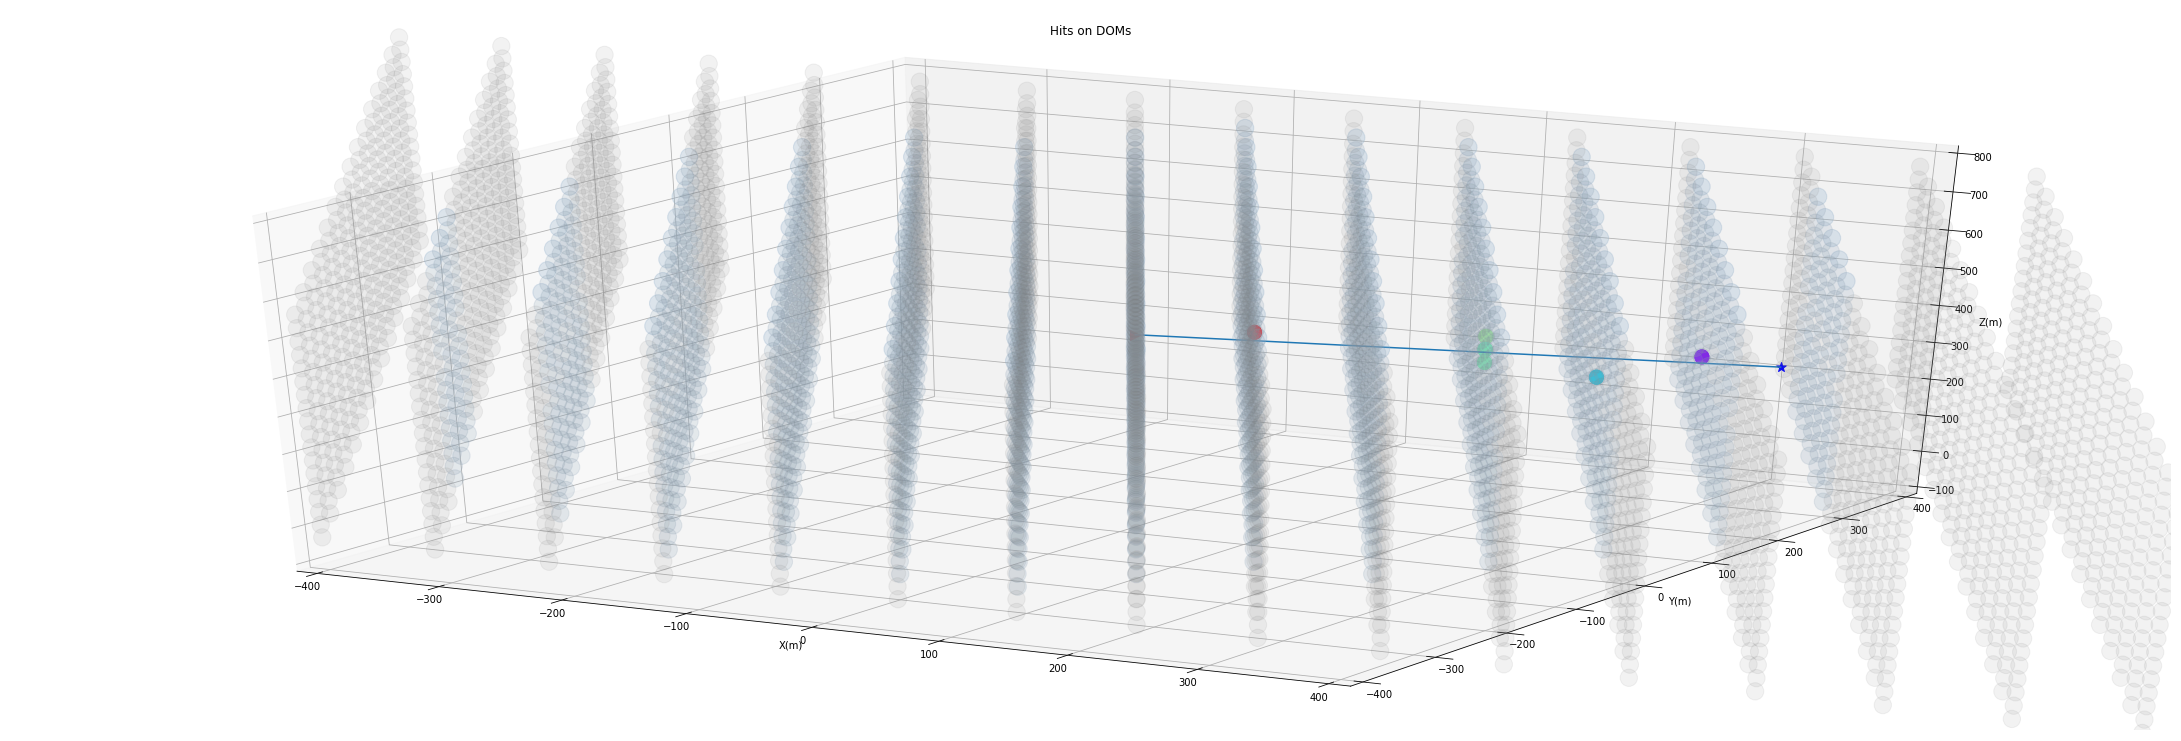

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
import matplotlib.cm as cm

fig = plt.figure(figsize=(30,10))
ax = Axes3D(fig)

# show detector function
def show_detector():
    """
    Function to show all of the doms in the (complete) detector
    The axes limits are set to display the whole detector
    
    Returns:
    --------
    ax : matplotlib Axes3D
    """
    ax.set_xlim(-400,400)
    ax.set_ylim(-400,400)
    ax.set_zlim(-100,800)
    ax.scatter(doms['x'], doms['y'], doms['z'], color='#A2D4FF', alpha=0.10, s=300)
    return ax

def show_detector_lattice():
    """
    Function to show all of the doms in the (complete) detector
    The axes limits are set to display the whole detector
    
    Returns:
    --------
    ax : matplotlib Axes3D
    """
    ax.set_xlim(-400,400)
    ax.set_ylim(-400,400)
    ax.set_zlim(-100,800)
    ax.scatter(l_doms['x'], l_doms['y'], l_doms['z'], color='#A2D4FF', alpha=0.10, s=300)
    return ax

def show_lattice():
    """
    Function to show all of the doms in the (complete) detector
    The axes limits are set to display the whole detector
    
    Returns:
    --------
    ax : matplotlib Axes3D
    """
    ax.set_xlim(-400,400)
    ax.set_ylim(-400,400)
    ax.set_zlim(-100,800)
    ax.scatter(lattice['x'], lattice['y'], lattice['z'], color='gray', alpha=0.10, s=300)
    return ax

# event_numu function

def event_numu_st_lattice(evt):
    
    """
    Function to plot a numucc event as the hit doms in the evt.
    The color scale from blue to red shows the hit times. Event starts at blue and ends in red

    Parameters:
    -----------
    evt : np.int
         event id to plot
    Returns:
    --------
    plot : matplotlib scatter
        scatter plot of the chosen numucc event  
    mc : mc_points 
        scatter plot of start and end position according to mc and line to display the mc track
    """
    #plot = scatter(evt, doms_hit_numu, '#FF8900')
    plot = scatter(evt, doms_hit_l_numu_st, norm_times_numu_st)
    mc = mc_points(evt, muon_positions_st)
    return plot, mc




def event_numu_st(evt):
    
    """
    Function to plot a numucc event as the hit doms in the evt.
    The color scale from blue to red shows the hit times. Event starts at blue and ends in red

    Parameters:
    -----------
    evt : np.int
         event id to plot
    Returns:
    --------
    plot : matplotlib scatter
        scatter plot of the chosen numucc event  
    mc : mc_points 
        scatter plot of start and end position according to mc and line to display the mc track
    """
    #plot = scatter(evt, doms_hit_numu, '#FF8900')
    plot = scatter(evt, doms_hit_numu_st, norm_times_numu_st)
    mc = mc_points(evt, muon_positions_st)
    return plot, mc

def event_numu_sh(evt, shift):
    
    """
    Function to plot a numucc event as the hit doms in the evt.
    The color scale from blue to red shows the hit times. Event starts at blue and ends in red

    Parameters:
    -----------
    evt : np.int
         event id to plot
    Returns:
    --------
    plot : matplotlib scatter
        scatter plot of the chosen numucc event  
    mc : mc_points 
        scatter plot of start and end position according to mc and line to display the mc track
    """
    #plot = scatter(evt, doms_hit_numu, '#FF8900')
    plot = scatter(evt, shifter(dom_id_numu_st, trig_numu_st, shift), norm_times_numu_st)
    mc = mc_points(evt, muon_positions_st)
    return plot, mc


def event_nue_st(evt):
    """
    Function to plot a nuecc event as the hit doms in the evt.
    The color scale from blue to red shows the hit times. Event starts at blue and ends in red

    Parameters:
    -----------
    evt : np.int
         event id to plot
    Returns:
    --------
    plot : matplotlib scatter
        scatter plot of the chosen nuecc event  
    mc : mc_points 
        scatter plot of start and end position according to mc and line to display the mc track
    """
    
    #plot = scatter(evt, doms_hit_nue, '#FF8900')
    plot = scatter(evt, doms_hit_nue_st, norm_times_nue_st)
    mc = mc_points(evt, electron_positions_st)
    return plot, mc

def event_numu_100ns_4hits(evt):
    
    """
    Function to plot a numucc event as the hit doms in the evt.
    The color scale from blue to red shows the hit times. Event starts at blue and ends in red

    Parameters:
    -----------
    evt : np.int
         event id to plot
    Returns:
    --------
    plot : matplotlib scatter
        scatter plot of the chosen numucc event  
    mc : mc_points 
        scatter plot of start and end position according to mc and line to display the mc track
    """
    #plot = scatter(evt, doms_hit_numu, '#FF8900')
    plot = scatter(evt, doms_hit_numu_100ns_4hits, norm_times_numu_100ns_4hits)
    mc = mc_points(evt, muon_positions_100ns_4hits)
    return plot, mc

#event_numu(5)
show_lattice()
show_detector_lattice()
plot1 = event_numu_st_lattice(6)
#plot2 = event_nue_st(800)

fig.suptitle('Hits on DOMs')
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
ax.set_zlabel('Z(m)')
#for angle in range(0,360):
#    ax.view_init(30,angle)
#    plt.draw()
#    plt.pause(.001)
plt.show()


In [40]:
1541/2

770

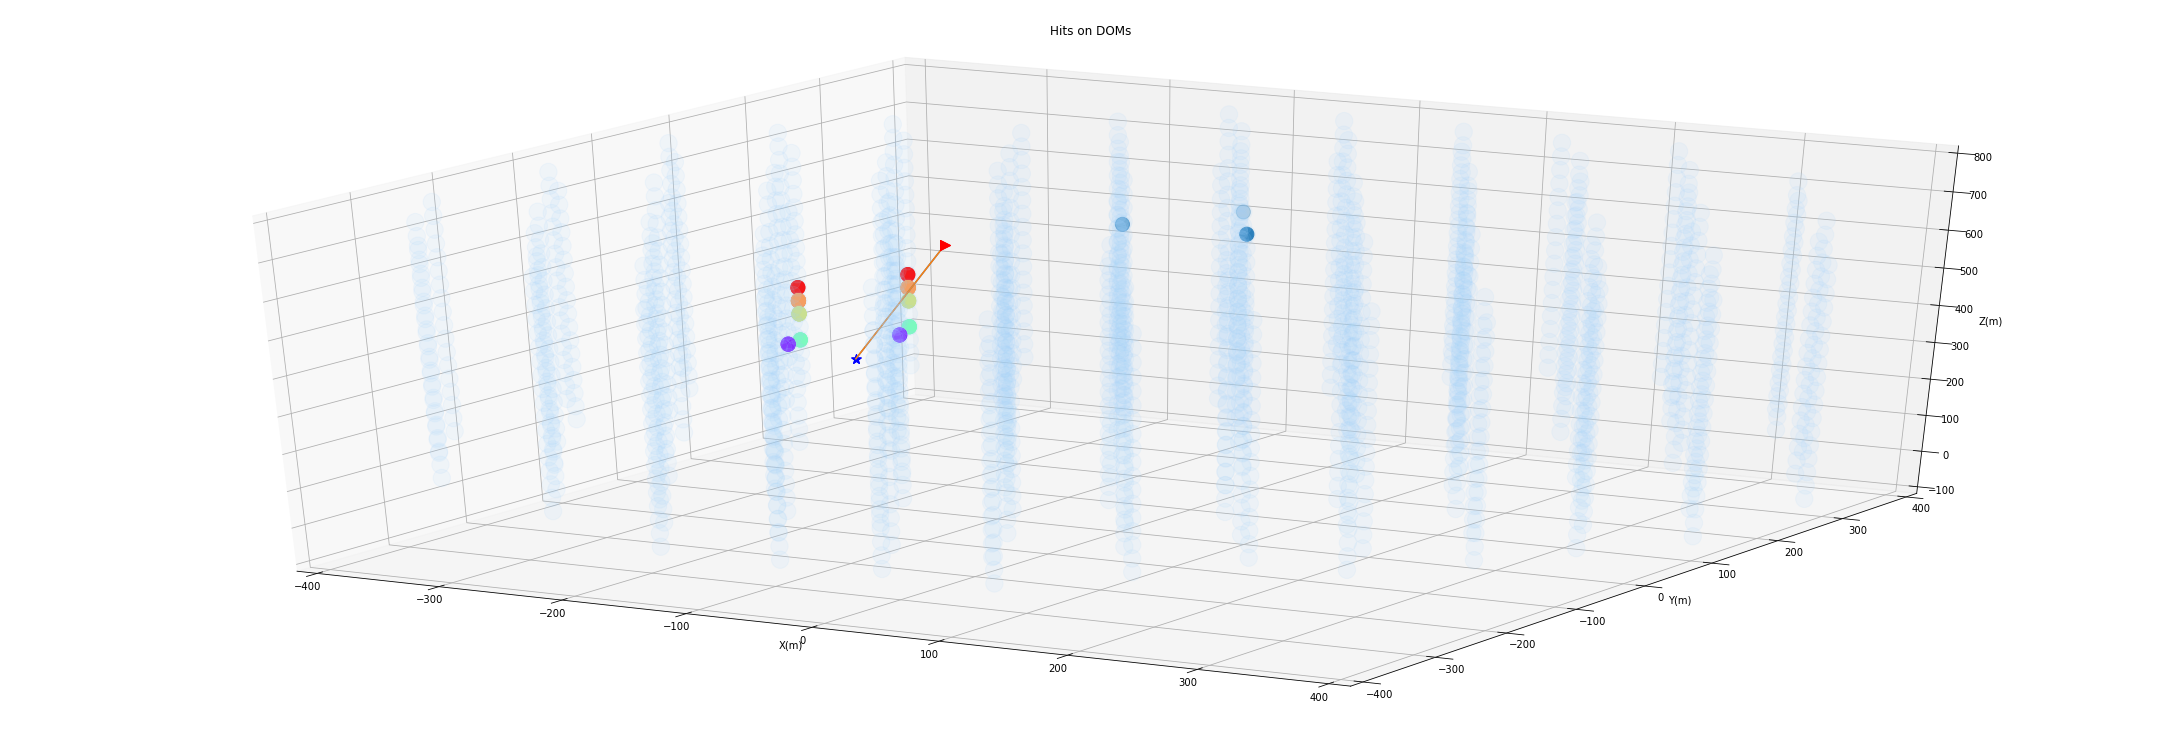

In [360]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
import matplotlib.cm as cm

fig = plt.figure(figsize=(30,10))
ax = Axes3D(fig)

show_detector()
plot1 = event_numu_sh(0, +18)
plot2 = event_numu_st(0)

fig.suptitle('Hits on DOMs')
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
ax.set_zlabel('Z(m)')
#ax.scatter(doms[range(18*78,18*79)]['x'],
#          doms[range(18*78,18*79)]['y'],
#          doms[range(18*78,18*79)]['z'], s=200)
ax.scatter(doms[[range(0,2070,18)[:3]]]['x'],
          doms[[range(0,2070,18)[:3]]]['y'],
          doms[[range(0,2070,18)[:3]]]['z'], s=200)
#for angle in range(0,360):
#    ax.view_init(30,angle)
#    plt.draw()
#    plt.pause(.001)
plt.show()


In [281]:
print((dom_id_numu_st[0][trig_numu_st[0]==1]-1)/18)
print((dom_id_numu_st[0][trig_numu_st[0]==1]-1)/18)+2

[ 77  77  77  77  77  77  77  77  77  77  77  77  77  77  77  77  77  77
  77 105 105 105]
[ 79  79  79  79  79  79  79  79  79  79  79  79  79  79  79  79  79  79
  79 107 107 107]


In [439]:
print((dom_id_numu_st[0][trig_numu_st[0]==1]-1)%18)

[10 10 11 11 11 11 11 11 11 11 11 12 12 12 12 12 14 14 14 16 16 16]


In [241]:
dom_id_numu_st[0][trig_numu_st[0]==1]-1

array([1396, 1396, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397,
       1398, 1398, 1398, 1398, 1398, 1400, 1400, 1400, 1906, 1906, 1906], dtype=int32)

In [321]:
doms[[0,18]]

array([(  6., -7.,  711.96083871), ( 99., -2.,  711.96083871)], 
      dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [329]:
np.sqrt((doms[18]['x']-doms[0]['x'])**2 + (doms[18]['y']-doms[0]['y'])**2)

93.134311615000414

In [341]:
np.sqrt((doms[36]['x']-doms[0]['x'])**2 + (doms[36]['y']-doms[0]['y'])**2)

97.49358953285082

In [297]:
doms[dom_id_numu_st[0][trig_numu_st[0]==1]-1]

array([(-313.,  240.,  351.96083871), (-313.,  240.,  351.96083871),
       (-313.,  240.,  315.96083871), (-313.,  240.,  315.96083871),
       (-313.,  240.,  315.96083871), (-313.,  240.,  315.96083871),
       (-313.,  240.,  315.96083871), (-313.,  240.,  315.96083871),
       (-313.,  240.,  315.96083871), (-313.,  240.,  315.96083871),
       (-313.,  240.,  315.96083871), (-313.,  240.,  279.96083871),
       (-313.,  240.,  279.96083871), (-313.,  240.,  279.96083871),
       (-313.,  240.,  279.96083871), (-313.,  240.,  279.96083871),
       (-313.,  240.,  207.96083871), (-313.,  240.,  207.96083871),
       (-313.,  240.,  207.96083871), (-359.,  302.,  135.96083871),
       (-359.,  302.,  135.96083871), (-359.,  302.,  135.96083871)], 
      dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [285]:
np.unique(dom_id_numu_st[0]/18)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114], dtype=int32)

In [289]:
1396/115

12

In [288]:
1397/115

12

In [193]:
print(np.unique((dom_id_numu_st[0]-1)/115))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [178]:
2017/115

17

In [179]:
2069/115

17

In [ ]:
shifter(dom_id_numu_st, trig_numu_st, 2)

In [64]:
print(muon_positions[0][990], muon_positions[1][990])

((-662.691,  207.882,  165.268), (-1687.80682986,  1161.55674474,  269.46578579))


#### obtain the shift between simulated event and the hits

In [198]:
print(np.mean(np.unique(doms_hit[3]['x'])),np.mean(np.unique(doms_hit[3]['y'])),np.mean(np.unique(doms_hit[3]['z'])),
      mu_pos[3], mu_end[3]) 

(372.25, 15.999999999999996, 418.81798156682038, ( 172.84, -99.859, -226.831), ( 554.04982348,  98.0646694,  265.51169042))


In [205]:
coord_origin

array([  13.887,    6.713,  405.932])

### plot the detector footprint

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
#plt.scatter(doms['x'], doms['y'], color='#A2D4FF', alpha=1, s=20)
plt.scatter(doms[[range(0,2070,18)[:50]]]['x'], doms[[range(0,2070,18)[:50]]]['y'], color='#A2D4FF', alpha=1, s=200)
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
fig.suptitle('Detector X-Y view')
plt.grid()
plt.show()


NameError: name 'doms' is not defined

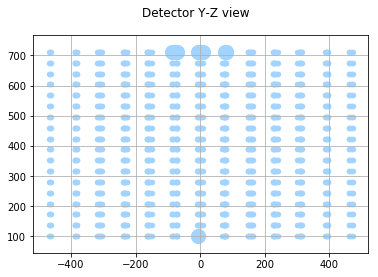

In [436]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(doms['y'], doms['z'], color='#A2D4FF', alpha=1, s=20)
plt.scatter(doms[[range(0,2070,18)[:10]]]['y'], doms[[range(0,2070,18)[:10]]]['z'], color='#A2D4FF', alpha=1, s=200)
plt.scatter(doms[17]['y'], doms[17]['z'], color = '#A2D4FF', alpha=1, s=200)
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
fig.suptitle('Detector Y-Z view')
plt.grid()
plt.show()



In [424]:
string_ids = np.asarray(range(1,2070,18))-1
print(string_ids)

[   0   18   36   54   72   90  108  126  144  162  180  198  216  234  252
  270  288  306  324  342  360  378  396  414  432  450  468  486  504  522
  540  558  576  594  612  630  648  666  684  702  720  738  756  774  792
  810  828  846  864  882  900  918  936  954  972  990 1008 1026 1044 1062
 1080 1098 1116 1134 1152 1170 1188 1206 1224 1242 1260 1278 1296 1314 1332
 1350 1368 1386 1404 1422 1440 1458 1476 1494 1512 1530 1548 1566 1584 1602
 1620 1638 1656 1674 1692 1710 1728 1746 1764 1782 1800 1818 1836 1854 1872
 1890 1908 1926 1944 1962 1980 1998 2016 2034 2052]


In [433]:
print( doms[string_ids]['z'])

[ 711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.96083871  711.96083871  711.96083871  711.96083871  711.96083871
  711.

### calculations to get the maximum amount of time needed to cross the whole detector 

In [371]:
doms[18*5]['y']

-73.0

In [87]:
print(np.max(np.hstack(times)))

50004225.0


In [88]:
print(np.min(np.hstack(times)))

49993098.0


In [98]:
100 * 10**-3 # 1 timeslice = 100 ms

0.1

In [96]:
50000000*(10**-9) # 50'000'000 ns = 0.005 s; half a timeslice

0.05

In [90]:
(50000000 - 49993098.0)*10**-6 # distance from the t_min to the center of the timeslice

0.006901999999999999

In [89]:
(50004225.0-50000000)*10**-6 #max_t - center of timeslice

0.004225

In [93]:
print(np.max(np.hstack(times_nue)), np.min(np.hstack(times_nue)))

(50000747.0, 49997887.0)


In [95]:
(50000000 - 49997887.0)* 10 **-6

0.002113

In [99]:
36 / 3e8

1.2e-07

In [106]:
300*(10**-9)

3.0000000000000004e-07

In [ ]:
0.04, 0.06

In [109]:
np.arange(0.04, 0.06, 3e-7)

array([ 0.04     ,  0.0400003,  0.0400006, ...,  0.0599992,  0.0599995,
        0.0599998])

In [77]:
for i in range(times.size):
    dt = np.max(times[i]- np.min(times[i]))
    print('dt: ', dt, 's: ', np.float16(dt * 10**-9 * 3*10**8))

('dt: ', 763.0, 's: ', 228.88)
('dt: ', 2588.0, 's: ', 776.5)
('dt: ', 1973.0, 's: ', 592.0)
('dt: ', 1727.0, 's: ', 518.0)
('dt: ', 1230.0, 's: ', 369.0)
('dt: ', 1103.0, 's: ', 331.0)
('dt: ', 1497.0, 's: ', 449.0)
('dt: ', 1843.0, 's: ', 553.0)
('dt: ', 1498.0, 's: ', 449.5)
('dt: ', 536.0, 's: ', 160.75)
('dt: ', 2674.0, 's: ', 802.0)
('dt: ', 1227.0, 's: ', 368.0)
('dt: ', 2165.0, 's: ', 649.5)
('dt: ', 2025.0, 's: ', 607.5)
('dt: ', 811.0, 's: ', 243.25)
('dt: ', 2565.0, 's: ', 769.5)
('dt: ', 2075.0, 's: ', 622.5)
('dt: ', 1391.0, 's: ', 417.25)
('dt: ', 1112.0, 's: ', 333.5)
('dt: ', 2428.0, 's: ', 728.5)
('dt: ', 2637.0, 's: ', 791.0)
('dt: ', 1650.0, 's: ', 495.0)
('dt: ', 861.0, 's: ', 258.25)
('dt: ', 575.0, 's: ', 172.5)
('dt: ', 1181.0, 's: ', 354.25)
('dt: ', 1120.0, 's: ', 336.0)
('dt: ', 1574.0, 's: ', 472.25)
('dt: ', 318.0, 's: ', 95.375)
('dt: ', 430.0, 's: ', 129.0)
('dt: ', 1463.0, 's: ', 439.0)
('dt: ', 1996.0, 's: ', 599.0)
('dt: ', 2480.0, 's: ', 744.0)
('dt: '

In [66]:
763 * 10**-9 * 3e8

228.9

In [71]:
can= ( -405.93, 508.68, 706.21)  #Z_min, Z_max, R?

In [72]:
Z = 508.68 - (-405.95)

914.63

In [74]:
diameter = 706.21*2
print(diameter)

1412.42


In [81]:
np.sqrt(914.63**2 + 1412.42**2)

1682.6997038390421

In [85]:
1682.7 / (3e8 )

5.609e-06

In [107]:
dom_id[0][trig[0]==1]-1

array([1396, 1396, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397,
       1398, 1398, 1398, 1398, 1398, 1400, 1400, 1400, 1906, 1906, 1906], dtype=int32)

### timeslices definition
#### timeslice used to rebin times

In [40]:
timeslices_numu = np.arange(np.min(np.hstack(times_numu))-1000, np.max(np.hstack(times_numu))+1000, 200)
print(timeslices_numu)

[ 49992098.  49992298.  49992498.  49992698.  49992898.  49993098.
  49993298.  49993498.  49993698.  49993898.  49994098.  49994298.
  49994498.  49994698.  49994898.  49995098.  49995298.  49995498.
  49995698.  49995898.  49996098.  49996298.  49996498.  49996698.
  49996898.  49997098.  49997298.  49997498.  49997698.  49997898.
  49998098.  49998298.  49998498.  49998698.  49998898.  49999098.
  49999298.  49999498.  49999698.  49999898.  50000098.  50000298.
  50000498.  50000698.  50000898.  50001098.  50001298.  50001498.
  50001698.  50001898.  50002098.  50002298.  50002498.  50002698.
  50002898.  50003098.  50003298.  50003498.  50003698.  50003898.
  50004098.  50004298.  50004498.  50004698.  50004898.  50005098.]


In [41]:
timeslices_numu.shape[0]

66

In [42]:
k = np.zeros((dom_id_numu.size, timeslices_numu.shape[0]-1))
for i in range(dom_id_numu.size):
    k[i] = np.histogram(times_numu[i], bins=timeslices_numu)[0]

In [43]:
k[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  8.,
        9.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [44]:
X = np.zeros((dom_id_numu.shape[0], ndoms, timeslices_numu.shape[0]-1))

In [45]:
X.shape

(1541, 2070, 65)

In [101]:
k = np.zeros((dom_id_numu.size, timeslices_numu.shape[0]-1))
for i in range(dom_id_numu.size):
    k[i] = np.histogram(times_numu[i], bins=timeslices_numu)[0]

In [103]:
k.shape

(1541, 65)

In [123]:
np.where(k[0]!=0)

(array([36, 38, 39, 40]),)

In [121]:
for i in range(X.shape[0]):
    X[i][(dom_id_numu[i][trig_numu[i]==True]-1)]=1
    X[i][1]=k[i]
    

### alternative definition 

In [46]:
X = np.zeros((dom_id_numu.shape[0], ndoms))

for i in range(dom_id_numu.size):
    X[i][(dom_id_numu[i][trig_numu[i]==True]-1)]=1

In [47]:
arr=[]
for k in range(dom_id_numu.shape[0]):
    arr.append((X[k], 
                np.asarray([np.histogram(times_numu[k][i], 
                                         bins=timeslices_numu)[0] for i in range((dom_id_numu[k][trig_numu[k]==True]-1).shape[0])])))

In [48]:
X_matrix = np.asarray(arr)

In [49]:
X_matrix.shape

(1541, 2)

In [55]:
X_matrix[0][0].shape

(2070,)

In [56]:
print(X_matrix[0][1].shape)

(22, 65)


In [120]:
Y_mu = np.ones(dom_id_numu.shape[0])
Y_e = np.zeros(dom_id_nue.shape[0])